In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
wine = pd.read_csv('data/wine.csv')

y = wine.iloc[:, -2]   # y = wine.iloc[:, 11]
del wine['quality'] # 정답컬럼 삭제
X = wine

y_en = pd.get_dummies(y) # 정답컬럼을 7개로 원핫인코딩


# 출력층의 활성화함수는 softmax로 설정해주자.
# compile loss = 'categorical_crossentropy'
tf.random.set_seed(3)

model = Sequential()
model.add(Dense(24, input_dim = 12, activation = 'relu')) # 입력층
model.add(Dense(48, activation = 'relu'))  # 은닉층1
model.add(Dense(24, activation = 'relu'))  # 은닉층2
model.add(Dense(7, activation = 'softmax')) # 출력층

# softmax 다중분류시 쓰는 활성화함수
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

### 1. 모델 실행 및 저장하기

In [4]:
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [5]:
import os

In [6]:
# 현재 폴더 탐색
MODEL_DIR = './model2'

# 폴더가 없다면 폴더 생성
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 저장할 파일명의 정규식 설정 {epoch의 수 - 손실값을 파일명으로 설정}    
modelpath = MODEL_DIR + "/{epoch:02d} - {val_loss:.4f}.hdf5"

# filepath : 저장한 파일경로
# monitor : 체크할 값(모니터할 값을 설정 (val_loss : 오차, val_Acc : 정확도, loss : 훈련오차))
# save_best_only(True) : 이전에 저장한 모델보다 나은 경우에만 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                              save_best_only = True, verbose = 1)

# validation_split = 0.33 : 33%만 테스트셋으로 사용
# callbacks 모델 시행중에 콜백함수 호출
history = model.fit(X, y_en, validation_split = 0.33, epochs = 1500, batch_size = 100, verbose = 0, callbacks = [checkpointer])


Epoch 00001: val_loss improved from inf to 1.32259, saving model to ./model2/01 - 1.3226.hdf5

Epoch 00002: val_loss improved from 1.32259 to 1.30002, saving model to ./model2/02 - 1.3000.hdf5

Epoch 00003: val_loss did not improve from 1.30002

Epoch 00004: val_loss did not improve from 1.30002

Epoch 00005: val_loss did not improve from 1.30002

Epoch 00006: val_loss did not improve from 1.30002

Epoch 00007: val_loss did not improve from 1.30002

Epoch 00008: val_loss improved from 1.30002 to 1.29319, saving model to ./model2/08 - 1.2932.hdf5

Epoch 00009: val_loss improved from 1.29319 to 1.27718, saving model to ./model2/09 - 1.2772.hdf5

Epoch 00010: val_loss did not improve from 1.27718

Epoch 00011: val_loss did not improve from 1.27718

Epoch 00012: val_loss did not improve from 1.27718

Epoch 00013: val_loss improved from 1.27718 to 1.26709, saving model to ./model2/13 - 1.2671.hdf5

Epoch 00014: val_loss did not improve from 1.26709

Epoch 00015: val_loss did not improve fr


Epoch 00139: val_loss did not improve from 1.06502

Epoch 00140: val_loss did not improve from 1.06502

Epoch 00141: val_loss did not improve from 1.06502

Epoch 00142: val_loss did not improve from 1.06502

Epoch 00143: val_loss did not improve from 1.06502

Epoch 00144: val_loss did not improve from 1.06502

Epoch 00145: val_loss did not improve from 1.06502

Epoch 00146: val_loss did not improve from 1.06502

Epoch 00147: val_loss did not improve from 1.06502

Epoch 00148: val_loss did not improve from 1.06502

Epoch 00149: val_loss did not improve from 1.06502

Epoch 00150: val_loss did not improve from 1.06502

Epoch 00151: val_loss did not improve from 1.06502

Epoch 00152: val_loss did not improve from 1.06502

Epoch 00153: val_loss did not improve from 1.06502

Epoch 00154: val_loss did not improve from 1.06502

Epoch 00155: val_loss did not improve from 1.06502

Epoch 00156: val_loss did not improve from 1.06502

Epoch 00157: val_loss did not improve from 1.06502

Epoch 00158


Epoch 00296: val_loss did not improve from 1.06395

Epoch 00297: val_loss did not improve from 1.06395

Epoch 00298: val_loss did not improve from 1.06395

Epoch 00299: val_loss did not improve from 1.06395

Epoch 00300: val_loss did not improve from 1.06395

Epoch 00301: val_loss did not improve from 1.06395

Epoch 00302: val_loss did not improve from 1.06395

Epoch 00303: val_loss did not improve from 1.06395

Epoch 00304: val_loss did not improve from 1.06395

Epoch 00305: val_loss did not improve from 1.06395

Epoch 00306: val_loss did not improve from 1.06395

Epoch 00307: val_loss did not improve from 1.06395

Epoch 00308: val_loss did not improve from 1.06395

Epoch 00309: val_loss did not improve from 1.06395

Epoch 00310: val_loss did not improve from 1.06395

Epoch 00311: val_loss did not improve from 1.06395

Epoch 00312: val_loss did not improve from 1.06395

Epoch 00313: val_loss did not improve from 1.06395

Epoch 00314: val_loss did not improve from 1.06395

Epoch 00315


Epoch 00454: val_loss did not improve from 1.06395

Epoch 00455: val_loss did not improve from 1.06395

Epoch 00456: val_loss did not improve from 1.06395

Epoch 00457: val_loss did not improve from 1.06395

Epoch 00458: val_loss did not improve from 1.06395

Epoch 00459: val_loss did not improve from 1.06395

Epoch 00460: val_loss did not improve from 1.06395

Epoch 00461: val_loss did not improve from 1.06395

Epoch 00462: val_loss did not improve from 1.06395

Epoch 00463: val_loss did not improve from 1.06395

Epoch 00464: val_loss did not improve from 1.06395

Epoch 00465: val_loss did not improve from 1.06395

Epoch 00466: val_loss did not improve from 1.06395

Epoch 00467: val_loss did not improve from 1.06395

Epoch 00468: val_loss did not improve from 1.06395

Epoch 00469: val_loss did not improve from 1.06395

Epoch 00470: val_loss did not improve from 1.06395

Epoch 00471: val_loss did not improve from 1.06395

Epoch 00472: val_loss did not improve from 1.06395

Epoch 00473


Epoch 00612: val_loss did not improve from 1.06395

Epoch 00613: val_loss did not improve from 1.06395

Epoch 00614: val_loss did not improve from 1.06395

Epoch 00615: val_loss did not improve from 1.06395

Epoch 00616: val_loss did not improve from 1.06395

Epoch 00617: val_loss did not improve from 1.06395

Epoch 00618: val_loss did not improve from 1.06395

Epoch 00619: val_loss did not improve from 1.06395

Epoch 00620: val_loss did not improve from 1.06395

Epoch 00621: val_loss did not improve from 1.06395

Epoch 00622: val_loss did not improve from 1.06395

Epoch 00623: val_loss did not improve from 1.06395

Epoch 00624: val_loss did not improve from 1.06395

Epoch 00625: val_loss did not improve from 1.06395

Epoch 00626: val_loss did not improve from 1.06395

Epoch 00627: val_loss did not improve from 1.06395

Epoch 00628: val_loss did not improve from 1.06395

Epoch 00629: val_loss did not improve from 1.06395

Epoch 00630: val_loss did not improve from 1.06395

Epoch 00631


Epoch 00771: val_loss did not improve from 1.06395

Epoch 00772: val_loss did not improve from 1.06395

Epoch 00773: val_loss did not improve from 1.06395

Epoch 00774: val_loss did not improve from 1.06395

Epoch 00775: val_loss did not improve from 1.06395

Epoch 00776: val_loss did not improve from 1.06395

Epoch 00777: val_loss did not improve from 1.06395

Epoch 00778: val_loss did not improve from 1.06395

Epoch 00779: val_loss did not improve from 1.06395

Epoch 00780: val_loss did not improve from 1.06395

Epoch 00781: val_loss did not improve from 1.06395

Epoch 00782: val_loss did not improve from 1.06395

Epoch 00783: val_loss did not improve from 1.06395

Epoch 00784: val_loss did not improve from 1.06395

Epoch 00785: val_loss did not improve from 1.06395

Epoch 00786: val_loss did not improve from 1.06395

Epoch 00787: val_loss did not improve from 1.06395

Epoch 00788: val_loss did not improve from 1.06395

Epoch 00789: val_loss did not improve from 1.06395

Epoch 00790


Epoch 00930: val_loss did not improve from 1.06395

Epoch 00931: val_loss did not improve from 1.06395

Epoch 00932: val_loss did not improve from 1.06395

Epoch 00933: val_loss did not improve from 1.06395

Epoch 00934: val_loss did not improve from 1.06395

Epoch 00935: val_loss did not improve from 1.06395

Epoch 00936: val_loss did not improve from 1.06395

Epoch 00937: val_loss did not improve from 1.06395

Epoch 00938: val_loss did not improve from 1.06395

Epoch 00939: val_loss did not improve from 1.06395

Epoch 00940: val_loss did not improve from 1.06395

Epoch 00941: val_loss did not improve from 1.06395

Epoch 00942: val_loss did not improve from 1.06395

Epoch 00943: val_loss did not improve from 1.06395

Epoch 00944: val_loss did not improve from 1.06395

Epoch 00945: val_loss did not improve from 1.06395

Epoch 00946: val_loss did not improve from 1.06395

Epoch 00947: val_loss did not improve from 1.06395

Epoch 00948: val_loss did not improve from 1.06395

Epoch 00949


Epoch 01090: val_loss did not improve from 1.06395

Epoch 01091: val_loss did not improve from 1.06395

Epoch 01092: val_loss did not improve from 1.06395

Epoch 01093: val_loss did not improve from 1.06395

Epoch 01094: val_loss did not improve from 1.06395

Epoch 01095: val_loss did not improve from 1.06395

Epoch 01096: val_loss did not improve from 1.06395

Epoch 01097: val_loss did not improve from 1.06395

Epoch 01098: val_loss did not improve from 1.06395

Epoch 01099: val_loss did not improve from 1.06395

Epoch 01100: val_loss did not improve from 1.06395

Epoch 01101: val_loss did not improve from 1.06395

Epoch 01102: val_loss did not improve from 1.06395

Epoch 01103: val_loss did not improve from 1.06395

Epoch 01104: val_loss did not improve from 1.06395

Epoch 01105: val_loss did not improve from 1.06395

Epoch 01106: val_loss did not improve from 1.06395

Epoch 01107: val_loss did not improve from 1.06395

Epoch 01108: val_loss did not improve from 1.06395

Epoch 01109


Epoch 01250: val_loss did not improve from 1.06395

Epoch 01251: val_loss did not improve from 1.06395

Epoch 01252: val_loss did not improve from 1.06395

Epoch 01253: val_loss did not improve from 1.06395

Epoch 01254: val_loss did not improve from 1.06395

Epoch 01255: val_loss did not improve from 1.06395

Epoch 01256: val_loss did not improve from 1.06395

Epoch 01257: val_loss did not improve from 1.06395

Epoch 01258: val_loss did not improve from 1.06395

Epoch 01259: val_loss did not improve from 1.06395

Epoch 01260: val_loss did not improve from 1.06395

Epoch 01261: val_loss did not improve from 1.06395

Epoch 01262: val_loss did not improve from 1.06395

Epoch 01263: val_loss did not improve from 1.06395

Epoch 01264: val_loss did not improve from 1.06395

Epoch 01265: val_loss did not improve from 1.06395

Epoch 01266: val_loss did not improve from 1.06395

Epoch 01267: val_loss did not improve from 1.06395

Epoch 01268: val_loss did not improve from 1.06395

Epoch 01269


Epoch 01408: val_loss did not improve from 1.06395

Epoch 01409: val_loss did not improve from 1.06395

Epoch 01410: val_loss did not improve from 1.06395

Epoch 01411: val_loss did not improve from 1.06395

Epoch 01412: val_loss did not improve from 1.06395

Epoch 01413: val_loss did not improve from 1.06395

Epoch 01414: val_loss did not improve from 1.06395

Epoch 01415: val_loss did not improve from 1.06395

Epoch 01416: val_loss did not improve from 1.06395

Epoch 01417: val_loss did not improve from 1.06395

Epoch 01418: val_loss did not improve from 1.06395

Epoch 01419: val_loss did not improve from 1.06395

Epoch 01420: val_loss did not improve from 1.06395

Epoch 01421: val_loss did not improve from 1.06395

Epoch 01422: val_loss did not improve from 1.06395

Epoch 01423: val_loss did not improve from 1.06395

Epoch 01424: val_loss did not improve from 1.06395

Epoch 01425: val_loss did not improve from 1.06395

Epoch 01426: val_loss did not improve from 1.06395

Epoch 01427

In [7]:
wine_model = tf.keras.models.load_model('model2/213 - 1.0640.hdf5')

In [8]:
wine_model.evaluate(X, y_en)

6497/6497 [==============================] - 0s 48us/sample - loss: 1.0470 - accuracy: 0.5492


[1.0469869315046263, 0.5491765]

In [10]:
y_loss = history.history['val_loss']

In [11]:
y_acc = history.history['accuracy']

In [12]:
x_len = np.arange(len(y_acc))

### 2. 그래프로 출력하기

In [14]:
from matplotlib import pyplot as plt

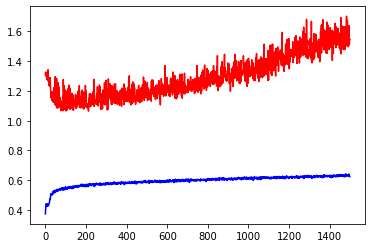

In [16]:
plt.plot(x_len, y_loss, c = "red", markersize = 3)
plt.plot(x_len, y_acc, c = "blue", markersize = 3)
plt.show()

### 3. 자동 학습 중단

#### 3.1  EarlyStopping - 테스트의 오차가 줄지 않으면 테스트를 멈추는 기능

In [17]:
from keras.callbacks import EarlyStopping

In [18]:
# epoch 마다 오차가 줄지 않아도 기다릴 횟수 -> patience
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 100)

model.fit(X, y_en, validation_split = 0.2 , epochs = 2000, batch_size = 500, callbacks = [early_stopping])

Train on 5197 samples, validate on 1300 samples
Epoch 1/2000
5197/5197 [==============================] - 0s 12us/sample - loss: 0.9433 - accuracy: 0.6065 - val_loss: 1.4277 - val_accuracy: 0.4877
Epoch 2/2000
5197/5197 [==============================] - 0s 6us/sample - loss: 0.9265 - accuracy: 0.6094 - val_loss: 1.4504 - val_accuracy: 0.4677
Epoch 3/2000
5197/5197 [==============================] - 0s 6us/sample - loss: 0.9165 - accuracy: 0.6111 - val_loss: 1.4036 - val_accuracy: 0.4669
Epoch 4/2000
5197/5197 [==============================] - 0s 7us/sample - loss: 0.9076 - accuracy: 0.6100 - val_loss: 1.3532 - val_accuracy: 0.4862
Epoch 5/2000
5197/5197 [==============================] - 0s 6us/sample - loss: 0.9053 - accuracy: 0.6171 - val_loss: 1.3944 - val_accuracy: 0.4654
Epoch 6/2000
5197/5197 [==============================] - 0s 7us/sample - loss: 0.9017 - accuracy: 0.6177 - val_loss: 1.3489 - val_accuracy: 0.4754
Epoch 7/2000
5197/5197 [==============================] - 0s 7u

Epoch 56/2000
5197/5197 [==============================] - 0s 6us/sample - loss: 0.8845 - accuracy: 0.6177 - val_loss: 1.3153 - val_accuracy: 0.4908
Epoch 57/2000
5197/5197 [==============================] - 0s 6us/sample - loss: 0.8839 - accuracy: 0.6140 - val_loss: 1.2849 - val_accuracy: 0.4992
Epoch 58/2000
5197/5197 [==============================] - 0s 7us/sample - loss: 0.8789 - accuracy: 0.6177 - val_loss: 1.2860 - val_accuracy: 0.5062
Epoch 59/2000
5197/5197 [==============================] - 0s 7us/sample - loss: 0.8822 - accuracy: 0.6217 - val_loss: 1.2927 - val_accuracy: 0.5108
Epoch 60/2000
5197/5197 [==============================] - 0s 7us/sample - loss: 0.8804 - accuracy: 0.6198 - val_loss: 1.3227 - val_accuracy: 0.4869
Epoch 61/2000
5197/5197 [==============================] - 0s 7us/sample - loss: 0.8814 - accuracy: 0.6184 - val_loss: 1.3068 - val_accuracy: 0.4931
Epoch 62/2000
5197/5197 [==============================] - 0s 6us/sample - loss: 0.8838 - accuracy: 0.6202

Epoch 111/2000
5197/5197 [==============================] - 0s 6us/sample - loss: 0.8809 - accuracy: 0.6188 - val_loss: 1.3296 - val_accuracy: 0.4938
Epoch 112/2000
5197/5197 [==============================] - 0s 6us/sample - loss: 0.8735 - accuracy: 0.6221 - val_loss: 1.3064 - val_accuracy: 0.5031
Epoch 113/2000
5197/5197 [==============================] - 0s 6us/sample - loss: 0.8734 - accuracy: 0.6250 - val_loss: 1.3542 - val_accuracy: 0.4715
Epoch 114/2000
5197/5197 [==============================] - 0s 6us/sample - loss: 0.8717 - accuracy: 0.6250 - val_loss: 1.3053 - val_accuracy: 0.5000
Epoch 115/2000
5197/5197 [==============================] - 0s 6us/sample - loss: 0.8714 - accuracy: 0.6246 - val_loss: 1.2858 - val_accuracy: 0.5138
Epoch 116/2000
5197/5197 [==============================] - 0s 5us/sample - loss: 0.8725 - accuracy: 0.6232 - val_loss: 1.3389 - val_accuracy: 0.4838
Epoch 117/2000
5197/5197 [==============================] - 0s 5us/sample - loss: 0.8735 - accuracy:

### 4. 과적합방지

In [20]:
from tensorflow.keras.layers import Dropout

In [21]:
model = Sequential()
model.add(Dense(24, input_dim = 12, activation = 'relu')) # 입력층
model.add(Dropout(0.5))
model.add(Dense(48, activation = 'relu'))  # 은닉층1
model.add(Dropout(0.75))
model.add(Dense(24, activation = 'relu'))  # 은닉층2
model.add(Dropout(0.6))
model.add(Dense(7, activation = 'softmax')) # 출력층